In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
stocks = pd.read_csv('sp500_cons_part_prc.csv')
stocks['datadate'] = pd.to_datetime(stocks['datadate'],format='%Y%m%d')

universe = pd.DataFrame(set(stocks['datadate']))
universe = universe.rename(columns={0:'datadate'})
universe = pd.DataFrame(universe['datadate'].sort_values())
universe.reset_index(inplace=True,drop=True)
universe['equal_weighted'] = None
universe['cap_weighted'] = None

for i in range(universe.shape[0]):
    date = universe.loc[i,'datadate']
    temp = stocks[(stocks['datadate']==date) & (stocks['trt1m'] == stocks['trt1m'])]
    universe.loc[i,'equal_weighted'] = np.mean(temp['trt1m'])/100
    universe.loc[i,'cap_weighted']= np.sum(temp['trt1m']*temp['w'])/100

In [30]:
universe

,datadate,equal_weighted,cap_weighted
0,2010-01-31,-0.0310582,-0.0317771
1,2010-02-28,0.0424571,0.033023
2,2010-03-31,0.0712299,0.0635248
3,2010-04-30,0.0278653,0.0192912
4,2010-05-31,-0.0729908,-0.0766316
...,...,...,...
115,2019-08-31,-0.0314989,-0.0114985
116,2019-09-30,0.0342624,0.0212717
117,2019-10-31,0.013395,0.0251754
118,2019-11-30,0.0345191,0.038548


In [15]:
sp500 = pd.read_csv('sp500_monthly.csv',header=None)

In [17]:
sp500.columns = ['index','date','close']

In [19]:
sp500['date'] = pd.to_datetime(sp500['date'])

In [22]:
sp500['sp500_return']=sp500['close']/sp500['close'].shift(1)

In [33]:
universe['sp500_return'] = sp500['sp500_return'].iloc[:120]-1

In [34]:
universe

,datadate,equal_weighted,cap_weighted,sp500_return
0,2010-01-31,-0.0310582,-0.0317771,NaN
1,2010-02-28,0.0424571,0.033023,0.028514
2,2010-03-31,0.0712299,0.0635248,0.058796
3,2010-04-30,0.0278653,0.0192912,0.014759
4,2010-05-31,-0.0729908,-0.0766316,-0.081976
...,...,...,...,...
115,2019-08-31,-0.0314989,-0.0114985,-0.018092
116,2019-09-30,0.0342624,0.0212717,0.017181
117,2019-10-31,0.013395,0.0251754,0.020432
118,2019-11-30,0.0345191,0.038548,0.034047


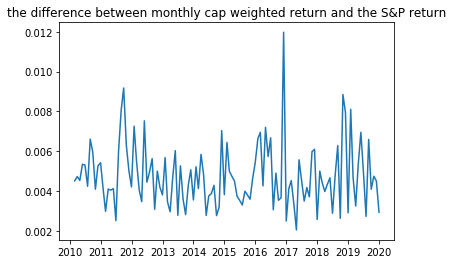

In [43]:
plt.plot(universe['datadate'],universe['cap_weighted']-universe['sp500_return'])
plt.title('the difference between monthly cap weighted return and the S&P return')
plt.show()

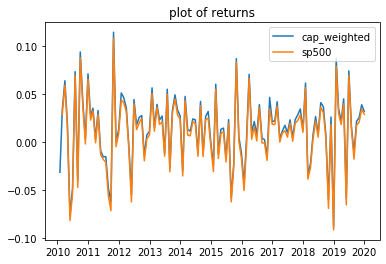

In [48]:
plt.plot(universe['datadate'],universe['cap_weighted'],label = 'cap_weighted')
plt.plot(universe['datadate'],universe['sp500_return'],label = 'sp500')
plt.title('plot of returns')
plt.legend()
plt.show()

In [51]:
universe['cap_cum'] = np.cumsum(universe['cap_weighted'])
universe['sp500_cum'] = np.cumsum(universe['sp500_return'])

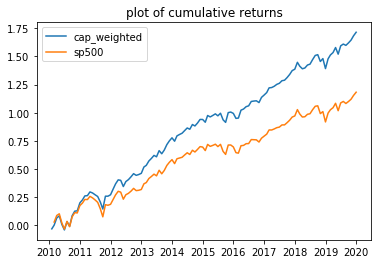

In [52]:
plt.plot(universe['datadate'],universe['cap_cum'],label = 'cap_weighted')
plt.plot(universe['datadate'],universe['sp500_cum'],label = 'sp500')
plt.title('plot of cumulative returns')
plt.legend()
plt.show()